#### CSE 452: Neural Networks and Fuzzy Systems Lab
Spring-2020, Dept. of CSE, NEUB <br>
Final Assignment_1 <br>
This assignment contain 3 tasks.

#### Student Info
<b>Name:</b> Hamiduzzaman Noyon<br>
<b>Reg. No:</b> 160303020004

### Assignment 1: Perceptron 
<b>This assignment contains three tasks</b><br>
Perceptron is the first neural network model that can learn from data, invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. 

* Linear classifier.
* Binary or bipolar data
\begin{equation}
  \hat y=
  \begin{cases}
    1, &  \sum_{i}^{m} w_i.x_i+b> 0  \\
    -1, & \text{otherwise}
  \end{cases}
\end{equation}

Or, we can write [for a single data vector= x, weight vector=w and bias=b]
\begin{equation}
  z=x.w+b\\
  \hat y=sign(z)
\end{equation}

Or, we can simplify,
\begin{equation}
  z=X.W^T\\
  \hat y=sign(z)
\end{equation}
where X=data (NxD), W=weight vector(1xD) , b=bias(1x1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
y=np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

In [3]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (14, 2)
y shape: (14,)


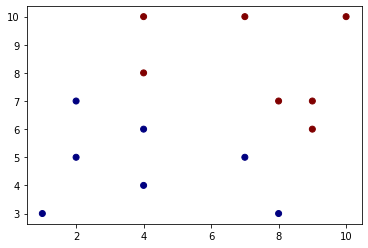

In [4]:
plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')   
plt.show()

<b>Task_1: calculate output</b><br>
Given, w=[-2.0, 0.4, 0.1], calculate output $\hat y$ <br> <b>note:</b> w[0]=bias<br>

\begin{equation}
  z=X.W^T\\
  \hat y=sign(z)
\end{equation}
 
* Output should be, $\hat y=[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]$
* Note: variable XX contains 1 in the first column and the rest is same as X. This will remove the necessity of useing seperate bias.

In [5]:
def predict(w,Xa):
    h=[]
    for x in range(len(Xa)):
        val=0
        Xa1=Xa[x]
        for y in range(len(w)):
            val=val+Xa1[y]*w[y]
        if(round(val,2)>0):
            h.append(1)
        else:
            h.append(-1)
    return h
w=[-2.0,0.4,0.1]
Xa= np.c_[np.ones(X.shape[0]), X]
pr_y=predict(w,Xa)
print(pr_y)

[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]


<b>Task_2: Update check</b><br>
Let's choose a missclassified data,  $rx=[1, 4,6], ry=-1$ <br>
Update rule: $w=w+ \eta(ry*rx)$  <br>
Where, learning rate $0> \eta \leq 1$ <br>
Let, $\eta=0.1$  <br>

Now,
* use w from task 1.
* update w for the data. updated w should be [-2.1,  0. , -0.5]

In [6]:
rx=[1,4,6]
ry=-1
lr=0.1
up_w=[]
for x in range(len(w)):
    temp=w[x]+(lr*(ry*rx[x]))
    up_w.append(round(temp,2))
print(up_w)

[-2.1, 0.0, -0.5]


<b>Task_3: Train perceptron</b> <br>

* your task is to implement perceptron learning algorithm. Your implementation should correctly classify the data above. <br>
* Print the trained W <br>
* Plot the data and the decision boundary <br>
* Plot loss history.

The goal is to find a correct hyperplane to correctly classify all the data.  Weight vector w defines the hyperplane aka the separating line.

<b>Perceptron learning algorithm</b>
1. Randomly initialize w
2. Classify all the training data
3. From the misclassified data choose one randomly. say <b>rx</b> with label <b>ry</b>
4. Update weights using the update rule.  𝒘=𝒘+𝜼(𝒓𝒙∗𝒓𝒚)   where 𝜼 𝒊𝒔 𝒍𝒆𝒂𝒓𝒏𝒊𝒏𝒈 𝒓𝒂𝒕𝒆. 
5. Classify training data using this updated w
6. Calculate average Loss $loss=\frac{1}{N} \sum(y-\hat y)^2$
7. Repeat step 2-7 until all data are correctly classified or maximum iteration reached.


In [7]:
def missclass(h,Y):
    miss=[]
    for i in range(len(Y)):
        if(h[i]!=Y[i]):
            miss.append(i)
    return miss

def avg_loss(y,up_y):
    temp=0
    for x in range(len(y)):
        temp=temp+(y[x]-up_y[x])**2
    loss=temp/len(y)
    return loss

def update_w(w,rx,ry):
    lr=0.1
    up_w=[]
    for x in range(len(w)):
        temp=w[x]+(lr*(ry*rx[x]))
        up_w.append(round(temp,2))
    return up_w


In [8]:
ran_w=np.random.rand(3)
h=predict(ran_w,Xa)
miss=missclass(h,y)
while(len(miss)>0):
    rn=np.random.choice(miss)
    rx=Xa[rn]
    ry=y[rn]
    ran_w=update_w(ran_w,rx,ry)
    h=predict(ran_w,Xa)
    loss=avg_loss(y,h)
    miss=missclass(h,y)

In [9]:
up_y=predict(ran_w,Xa)
print(up_y)

[1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1]


### Submission: Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Hamiduzzaman Noyon</u> bearing registration no. <u>160303020004</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Hamiduzzaman Noyon</u><br>
Date: <u>25/07/20</u>

_start writing here_